<a href="https://colab.research.google.com/github/IreneMNS/DATA-MINING-/blob/main/DISCRETIONARY%20TASK%201-6%F0%9F%A5%B0%E2%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Konsumsi Energi Terbarukan Panel Surya Terhadap Pemanfaatan untuk Listrik**

### **Studi Kasus**

Sumber Daya Listrik merupakan salah satu sumber daya yang paling dibutuhkan manusia dalam kehidupan sehari - hari, untuk mendapatkan sumber energi listrik manusia pun melakukan pencarian penuh agar bisa terus mempertahankan sumber daya listrik dengan memaanfaatkan sumber daya Alam yang tersedia dimana salah satunya adalah Batu bara, Nuklir, Radiosel, Air, dan lain sebagainya.

Namun, beberapa sumber daya tentu saja akan habis pada masanya dan juga beberapa memiliki dampak yang buruk pula pada lingkungan.

Dalam mengatasi hal tersebut pun tentunya ditemukan sumber daya terbarukan seperti listrik dari tenaga surya.

# **Import Library**

In [ ]:
from google.colab import userdata
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = userdata.get('username')
os.environ['KAGGLE_KEY'] = userdata.get('apikey')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
!kaggle datasets download -d pythonafroz/renewable-power-generation-and-weather-conditions --unzip

Dataset URL: https://www.kaggle.com/datasets/pythonafroz/renewable-power-generation-and-weather-conditions
License(s): CC0-1.0


**Library untuk Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# **Business Understanding**

### **Business Objective**

Digunakan untuk melihat situasi penggunaan sumber daya yang terjadi mengingat sumber daya untuk pembangkit listrik saat ini cukup banyak namun sumber daya yang berkembang dan mulai digunakan banyak masyarakat adalah sumber daya tenaga surya.

### **Assess Situation**

Namun dalam pemakaian tenaga surya untuk listrik dalam rumah memiliki tantangan ketika cuaca buruk ataupun musim tanpa matahari melanda bagi negara dengan 4 musim.

Kerugian yang ditimbulkan apabila cuaca tidak bersahabat tentunnya sangat merugikan.

### **Data Mining Goals**

Menemukan jumlah penggunaan tenaga surya terhadap listrik tergantung pada cuaca yang terjadi, apakah cenderung lebih kecil atau lebih besar dan menemukan apakah tenaga surya merupakan sumber daya yang baik dalam pengggunaannya ke listrik untuk setiap rumah.

### **Project Plan**

Melihat adanya konsumsi energi listrik yang digunakan berdasarkan cuaca terhadap pemakaian panel surya

# **Data Understanding**

### **Collect Initial Data**

Jelaskan darimana sumber data kalian di sini, sertakan linknya juga ya (ganti aja tulisan ini)

In [ ]:
df_kaggle = pd.read_csv('/content/Renewable.csv')
df_kaggle.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


### **Describe Data**

##### **Informasi Dasar**

In [ ]:
print("Baris :")
print(df_kaggle.shape[0])
print("Kolom :")
print(df_kaggle.shape[1])

Baris :
196776
Kolom :
17


Jangan lupa tuliskan penjelasannya di sini ya (ganti aja tulisan ini)

##### **Informasi Lanjutan**

In [ ]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

Jangan lupa sertakan penjelasan tiap kolomnya di sini ya, dari nama kolom, berapa jumlahnya, dan tipe data dari kolom tersebut (Kalau kolomnya 10 ya di buat sampai nomor 10) (ganti aja tulisan ini)

##### **Statistika Deskriptif**

In [ ]:
df_kaggle.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


Jangan lupa berikan penjelasan juga disini yaa (tiap - tiap kolomnya, kecualikan aja kolom ID atau sejenis unique values) (ganti aja tulisannya)

### **Exploratory Data Analysis**

Setelah visualisasi ditampilkan, wajib diberikan penjelasan yaa dari visualisasi tersebut (jelaskan menggunakan gaya bahasa kalian sendiri)

Masing masing pilar di bawah kalian sesuaikan aja, jangan dipaksakan kalau gak ada

##### **Distribution**

In [ ]:
print(df_kaggle.columns)

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')


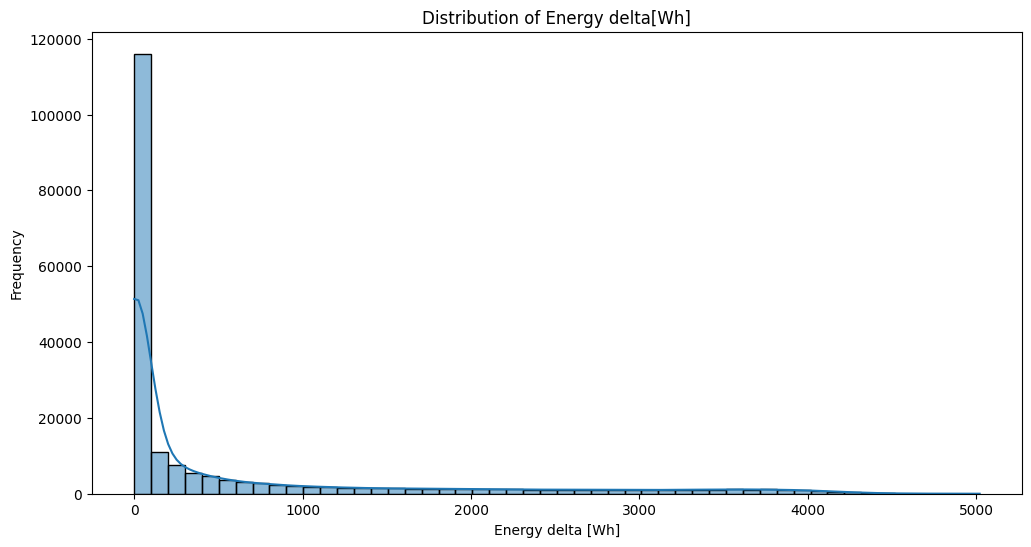

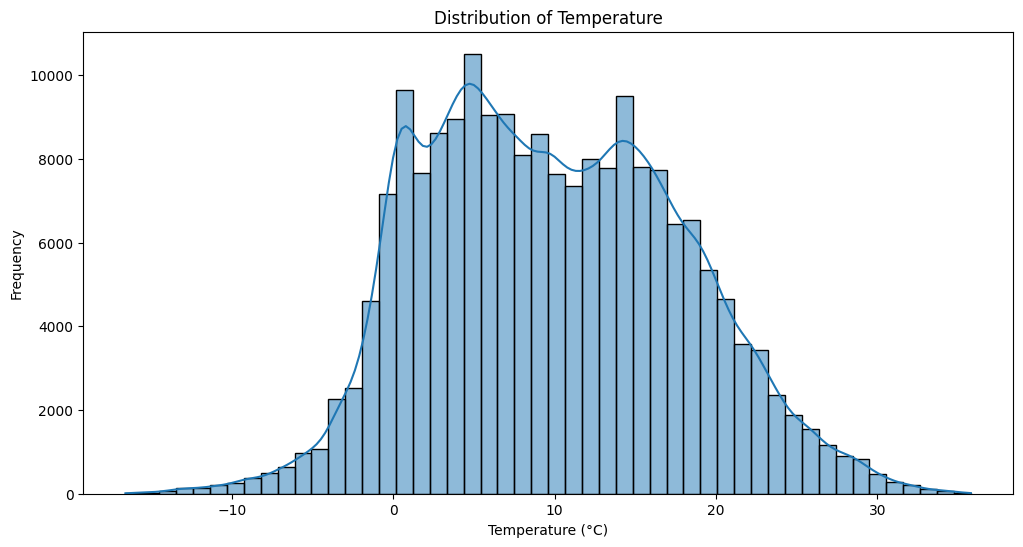

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df_kaggle['Energy delta[Wh]'], bins=50, kde=True)
plt.title('Distribution of Energy delta[Wh]')
plt.xlabel('Energy delta [Wh]')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df_kaggle['temp'], bins=50, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

##### **Composition**

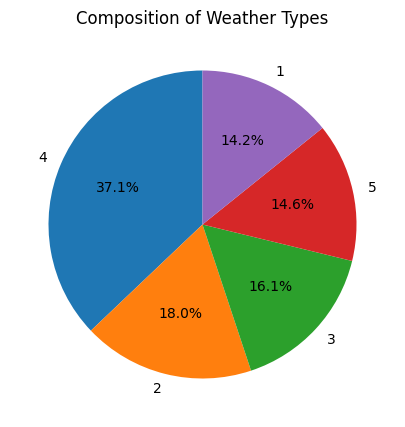

In [ ]:
plt.figure(figsize=(10,5))
df_kaggle['weather_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Composition of Weather Types')
plt.ylabel('')
plt.show()

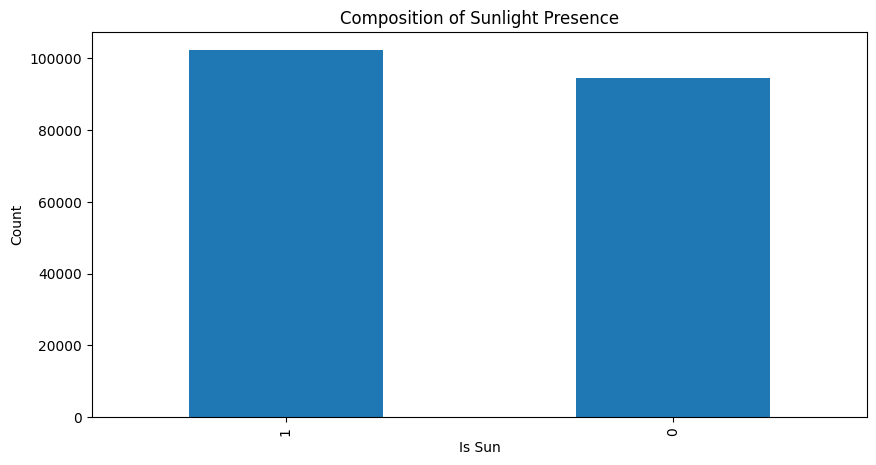

In [ ]:
plt.figure(figsize=(10,5))
df_kaggle['isSun'].value_counts().plot(kind='bar')
plt.title('Composition of Sunlight Presence')
plt.xlabel('Is Sun')
plt.ylabel('Count')
plt.show()

##### **Relationship**

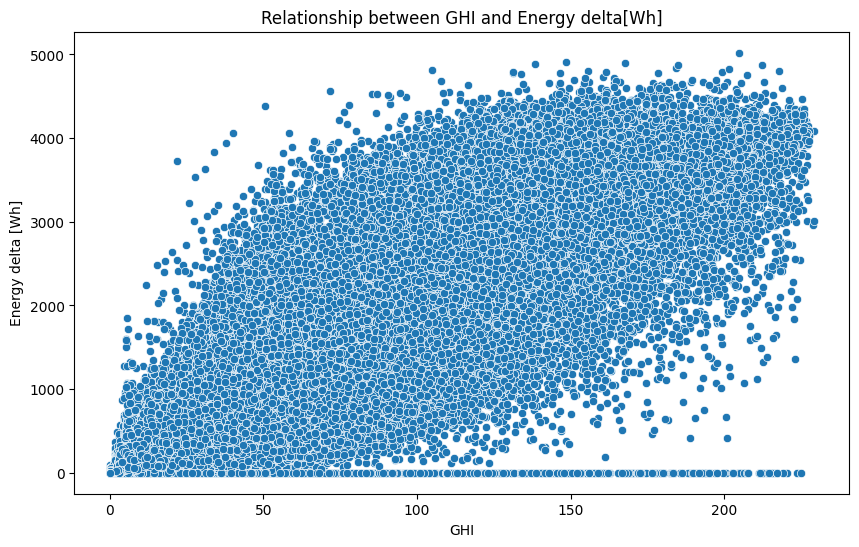

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GHI', y='Energy delta[Wh]', data=df_kaggle)
plt.title('Relationship between GHI and Energy delta[Wh]')
plt.xlabel('GHI')
plt.ylabel('Energy delta [Wh]')
plt.show()

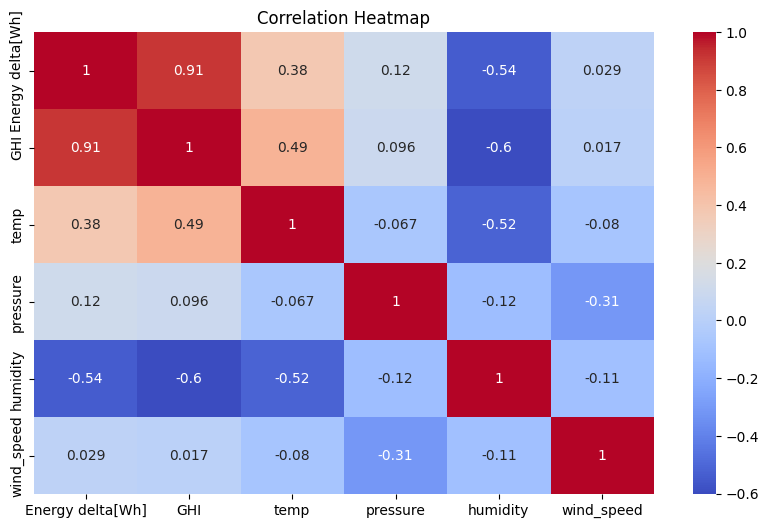

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_kaggle[['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### **Comparison**

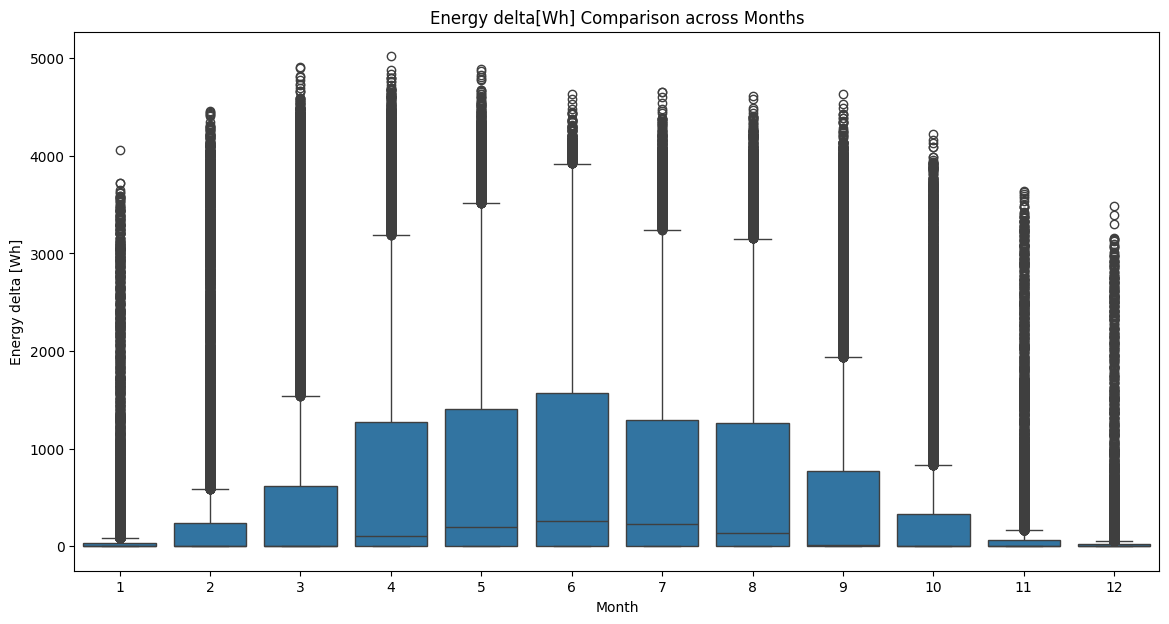

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(x='month', y='Energy delta[Wh]', data=df_kaggle)
plt.title('Energy delta[Wh] Comparison across Months')
plt.xlabel('Month')
plt.ylabel('Energy delta [Wh]')
plt.show()

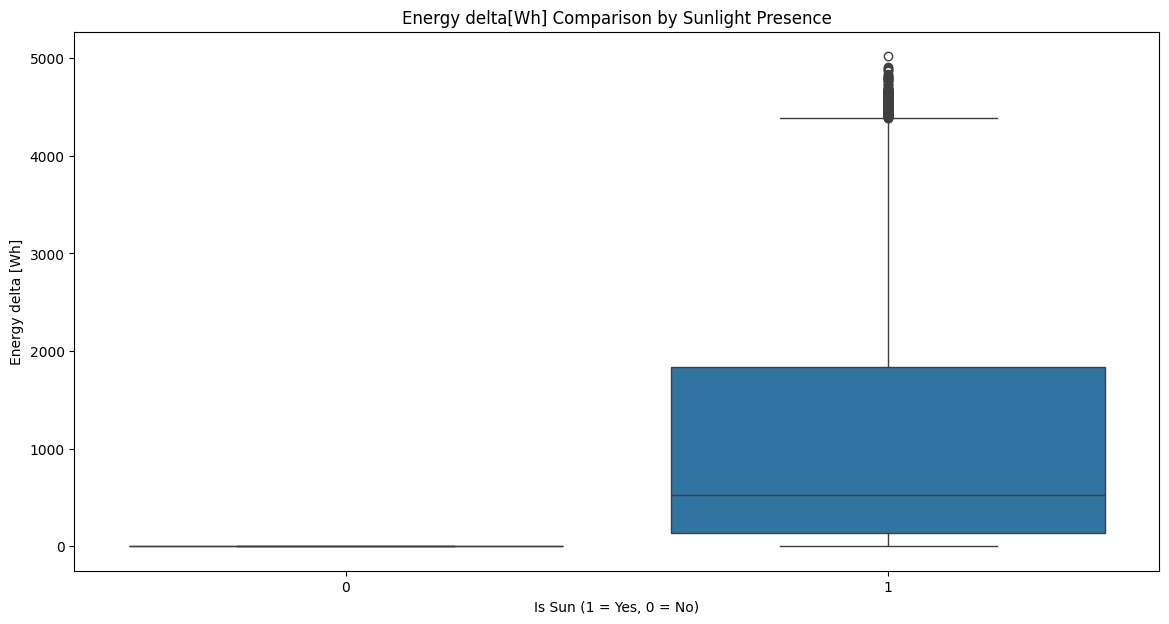

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(x='isSun', y='Energy delta[Wh]', data=df_kaggle)
plt.title('Energy delta[Wh] Comparison by Sunlight Presence')
plt.xlabel('Is Sun (1 = Yes, 0 = No)')
plt.ylabel('Energy delta [Wh]')
plt.show()

### **Verify Data Quality**

##### **Missing Values**

In [ ]:
print(df_kaggle.isnull().sum())

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64


Jangan lupa juga untuk berikan penjelasan di sini (baik ada nilai kosong maupun gak ada nilai kosongnya)

##### **Outliers Values**

In [ ]:
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers detected.")

for col in ['Energy delta[Wh]', 'temp', 'pressure', 'humidity', 'wind_speed']:
    detect_outliers_iqr(df_kaggle, col)


Energy delta[Wh]: 30881 outliers detected.
temp: 140 outliers detected.
pressure: 6400 outliers detected.
humidity: 1472 outliers detected.
wind_speed: 2828 outliers detected.


Jangan lupa juga untuk berikan penjelasan di sini (baik ada outliers maupun gak ada nilai outliersnya)

##### **Duplicated Values**

In [ ]:
df_kaggle.duplicated().sum()

np.int64(0)

Jangan lupa juga untuk berikan penjelasan di sini (baik ada nilai duplikat maupun gak ada nilai duplikat)

##### **Inconsistent Values/Noise**

In [ ]:
print(f"Unique values in 'isSun': {df_kaggle['isSun'].unique()}")
print(f"Unique values in 'weather_type': {df_kaggle['weather_type'].unique()}")
print(f"Unique values in 'month': {df_kaggle['month'].unique()}")

Unique values in 'isSun': [0 1]
Unique values in 'weather_type': [4 5 3 2 1]
Unique values in 'month': [ 1  2  3  4  5  6  7  8  9 10 11 12]



Jangan lupa juga untuk berikan penjelasan di sini

# **Data Preparation**

### **Data Cleaning**

##### **Handling Missing Values**

In [ ]:
print((df_kaggle .isna().sum() / len(df_kaggle)) * 100)

Time                      0.0
Energy delta[Wh]          0.0
GHI                       0.0
temp                      0.0
pressure                  0.0
humidity                  0.0
wind_speed                0.0
rain_1h                   0.0
snow_1h                   0.0
clouds_all                0.0
isSun                     0.0
sunlightTime              0.0
dayLength                 0.0
SunlightTime/daylength    0.0
weather_type              0.0
hour                      0.0
month                     0.0
dtype: float64


##### **Handling Duplicated Data**

In [ ]:
df_kaggle[df_kaggle.duplicated()]

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month


In [ ]:
df_kaggle = df_kaggle.drop_duplicates()

##### **Handling Outliers Value**

In [ ]:
results = []

# Pilih kolom bertipe numerik
cols = df_kaggle.select_dtypes(include=['float64', 'int64']).columns

for col in cols:
    q1 = df_kaggle[col].quantile(0.25)
    q3 = df_kaggle[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Fix di sini: semua tetap pakai df_kaggle
    outliers = df_kaggle[(df_kaggle[col] < lower_bound) | (df_kaggle[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(df_kaggle)) * 100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Jadikan hasilnya dataframe
results_df_kaggle = pd.DataFrame(results)
results_df_kaggle.set_index('Kolom', inplace=True)

# Tampilkan hasil
display(results_df_kaggle)


,Persentase Outliers
Kolom,
Energy delta[Wh],15.693479
GHI,10.340184
temp,0.071147
pressure,3.252429
humidity,0.748059
wind_speed,1.437167
rain_1h,12.688539
snow_1h,1.900638
clouds_all,0.000000


##### **Handling Inconsistent/Noise Data**

In [ ]:
# --- HANDLING INCONSISTENT / NOISE DATA ---

# Cek nilai aneh / noise di kolom-kolom kategori
print("\nNilai unik sebelum diperbaiki:")
print(f"isSun: {df_kaggle['isSun'].unique()}")
print(f"weather_type: {df_kaggle['weather_type'].unique()}")
print(f"month: {df_kaggle['month'].unique()}")

# Contoh: Perbaiki noise
# Untuk 'isSun', harus 0 atau 1, kita set selain itu jadi NaN
df_kaggle['isSun'] = df_kaggle['isSun'].apply(lambda x: x if x in [0,1] else np.nan)

# Untuk 'month', pastikan 1-12
df_kaggle['month'] = df_kaggle['month'].apply(lambda x: x if 1 <= x <= 12 else np.nan)

# Drop baris yang mengandung NaN setelah perbaikan
df_kaggle.dropna(inplace=True)

print("\nNilai unik setelah diperbaiki:")
print(f"isSun: {df_kaggle['isSun'].unique()}")
print(f"month: {df_kaggle['month'].unique()}")


Nilai unik sebelum diperbaiki:
isSun: [0 1]
weather_type: [4 5 3 2 1]
month: [ 1  2  3  4  5  6  7  8  9 10 11 12]

Nilai unik setelah diperbaiki:
isSun: [0 1]
month: [ 1  2  3  4  5  6  7  8  9 10 11 12]


##### **Pengecekkan Hasil**

### **Construct Data**


##### **Feature Engineering**

In [ ]:
# === A. FEATURE ENGINEERING ===
# Membuat fitur baru misal 'isRain' dan 'isSnow'
df_kaggle['isRain'] = df_kaggle['rain_1h'].apply(lambda x: 1 if x > 0 else 0)
df_kaggle['isSnow'] = df_kaggle['snow_1h'].apply(lambda x: 1 if x > 0 else 0)

# Membuat fitur 'Day/Night' berdasarkan jam
df_kaggle['day_night'] = df_kaggle['hour'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')

##### **Pengecekkan Hasil**

In [ ]:
# --- CEK HASIL FEATURE ENGINEERING ---
df_kaggle.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,isRain,isSnow,day_night
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,0,0,night
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,0,0,night
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,0,0,night
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,0,0,night
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1,0,0,night


### **Data Reduction**

In [ ]:
# 1. Hitung korelasi antar fitur numerik
df_corr = df_kaggle.corr(numeric_only=True)

# 2. Visualisasi korelasi (biar kelihatan mana yang korelasinya rendah)
fig = px.imshow(df_corr, title="Correlation Matrix")
fig.show()

In [ ]:
# 3. Drop fitur yang dirasa kurang penting
# Misal: 'sunlightTime', 'dayLength', 'SunlightTime/daylength' punya korelasi tinggi satu sama lain
columns_to_drop = ['sunlightTime', 'dayLength', 'SunlightTime/daylength', 'rain_1h', 'snow_1h']

df_reduced = df_kaggle.drop(columns=columns_to_drop)

##### **Pengecekkan Hasil**

In [ ]:
# 4. Lihat dataframe hasil reduction
print("\nData setelah Reduction:")
display(df_reduced.head())


Data setelah Reduction:


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,clouds_all,isSun,weather_type,hour,month,isRain,isSnow,day_night
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,100,0,4,0,1,0,0,night
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,100,0,4,0,1,0,0,night
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,100,0,4,0,1,0,0,night
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,100,0,4,0,1,0,0,night
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,100,0,4,1,1,0,0,night


### **Data Transformation**

##### **Mapping**

In [ ]:
df_kaggle['weather_type'] = df_kaggle['weather_type'].map({
    'Clear': 0,
    'Cloudy': 1,
    'Rainy': 2,
    'Snowy': 3
})

# Convert ke float terlebih dahulu agar NaN tetap bisa di-handle
df_kaggle['weather_type'] = df_kaggle['weather_type'].astype(float)

# Ganti NaN menjadi 0, baru convert ke integer
df_kaggle['weather_type'] = df_kaggle['weather_type'].fillna(0).astype(int)


In [ ]:
df_kaggle.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,isRain,isSnow,day_night
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,0,0,1,0,0,night
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,0,0,1,0,0,night
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,0,0,1,0,0,night
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,0,0,1,0,0,night
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,0,1,1,0,0,night


##### **Encoding**

In [ ]:
df_kaggle = pd.get_dummies(df_kaggle, columns=['day_night'])

### **Saving Data**

In [ ]:
df_kaggle.to_csv('Renewable.csv', index=False)

#**Modelling**

###**Select Modelling Techniques**

Saya memilih modelling Regresi sebab Project Plan saya adalah memprediksi jumlah energi yang digunakan berdasarkan variabel cuaca sebab Random Forest dan XGBoost sendiri cocok digunkana untuk menangani data yang besar dan kompleks.

#####**Random Forest Regressor**

Random Forest Regression adalah algoritma pembelajaran mesin berbasis ensemble yang digunakan untuk memprediksi nilai numerik atau kontinu (tugas regresi). Algoritma ini beroperasi dengan membangun beberapa decision trees (pohon keputusan) dari subset data dan fitur yang dipilih secara acak.

#####**XGBoost (Extreme Gradient Boosting)**

XGBoost atau Extreme Gradient Boosting adalah algoritma pembelajaran mesin yang efisien dan kuat yang dirancang untuk tugas klasifikasi dan regresi. Algoritma ini bekerja dengan vara melatih pembelajar lemah, biasanya decision tree, secara iteratif, dan menggabungkan prediksi mereka untuk membuat model yang akurat dan kuat.

###**Pre-Processing**

#####**Split Data**

In [ ]:
features = ['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'isSun', 'hour', 'month']
target = 'Energy delta[Wh]'

X = df_kaggle[features]
y = df_kaggle[target]

# 2. Split Data: 80% Train - 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df_kaggle.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,...,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,isRain,isSnow,day_night_day,day_night_night
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,...,0,450,0.0,0,0,1,0,0,False,True
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,...,0,450,0.0,0,0,1,0,0,False,True
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,...,0,450,0.0,0,0,1,0,0,False,True
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,...,0,450,0.0,0,0,1,0,0,False,True
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,...,0,450,0.0,0,1,1,0,0,False,True


#####**Normalisasi Data**

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###**Build and Train Model**

#####**Random Forest Regressor**

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
rf_pred = model_rf.predict(X_test_scaled)

#####**XGBOOST**

In [ ]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model_xgb.fit(X_train_scaled, y_train)
xgb_pred = model_xgb.predict(X_test_scaled)

###**Begins and Compare Predict**

#####**Predict Regresor**

In [ ]:
y_pred_rf = model_rf.predict(X_test_scaled)

#####**Predict XGBoost**

In [ ]:
y_pred_xgb = model_xgb.predict(X_test_scaled)

#####**Konversi DataFrame**

In [ ]:
# 2. Konversi X_test ke DataFrame lagi biar rapi
X_test_df = pd.DataFrame(X_test, columns=features).reset_index(drop=True)

# 3. Konversi y_test ke DataFrame
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

# 4. Konversi hasil prediksi ke DataFrame
rf_pred_col = pd.DataFrame(y_pred_rf.astype(float), columns=["rf_prediction"])
xgb_pred_col = pd.DataFrame(y_pred_xgb.astype(float), columns=["xgb_prediction"])

# 5. Gabungkan semua menjadi satu tabel
combined_data_reg = pd.concat([X_test_df, y_test_df, rf_pred_col, xgb_pred_col], axis=1)

#####**Hasil**

In [ ]:
# 6. Tampilkan hasil
combined_data_reg.head()

,GHI,temp,pressure,humidity,wind_speed,clouds_all,isSun,hour,month,Energy delta[Wh],rf_prediction,xgb_prediction
0,35.2,-0.7,1008,94,4.0,99,1,7,2,392,482.30,491.353363
1,0.0,13.8,1018,76,5.5,52,0,22,7,0,0.00,-9.705852
2,0.0,1.7,1024,61,3.0,22,0,20,4,0,0.00,2.105587
3,0.0,7.7,1023,97,2.1,0,0,2,6,0,0.00,0.118788
4,68.5,8.9,1009,63,6.0,100,1,13,3,881,1056.84,1166.220215


#**Evaluation**

In [ ]:
regression_metrics = {
    "Random Forest Regressor": {
        "MAE": mean_absolute_error(y_test, rf_pred),
        "MSE": mean_squared_error(y_test, rf_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, rf_pred)),
        "MAPE": mean_absolute_percentage_error(y_test, rf_pred),
        "R2": r2_score(y_test, rf_pred)
    },
    "XGBoost Regressor": {
        "MAE": mean_absolute_error(y_test, xgb_pred),
        "MSE": mean_squared_error(y_test, xgb_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, xgb_pred)),
        "MAPE": mean_absolute_percentage_error(y_test, xgb_pred),
        "R2": r2_score(y_test, xgb_pred)
    }
}

# Buat DataFrame
regression_metrics_df = pd.DataFrame(regression_metrics).T

# Tampilkan Tabel
regression_metrics_df.style.format("{:.4f}").highlight_min(color='green', axis=0)

,MAE,MSE,RMSE,MAPE,R2
Random Forest Regressor,113.0011,74150.0089,272.3050,23277799762682076.0000,0.9327
XGBoost Regressor,122.1007,76698.3672,276.9447,38121820481650688.0000,0.9304


##**VISUALIZED**

In [ ]:
plt.figure(figsize=(14,6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

###**Random Forest**

Text(0.5, 1.0, 'Random Forest Regressor')

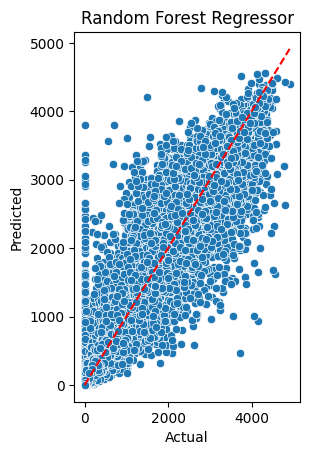

In [ ]:
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')

###**XGBoost**

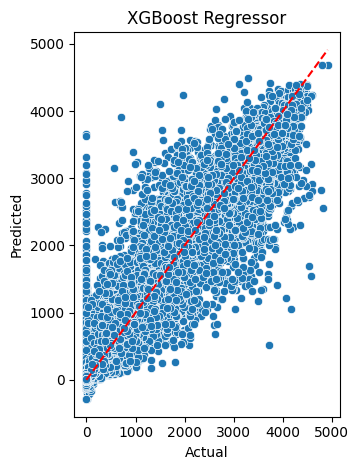

In [ ]:
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost Regressor')

plt.tight_layout()
plt.show()

###**Visualization Review**

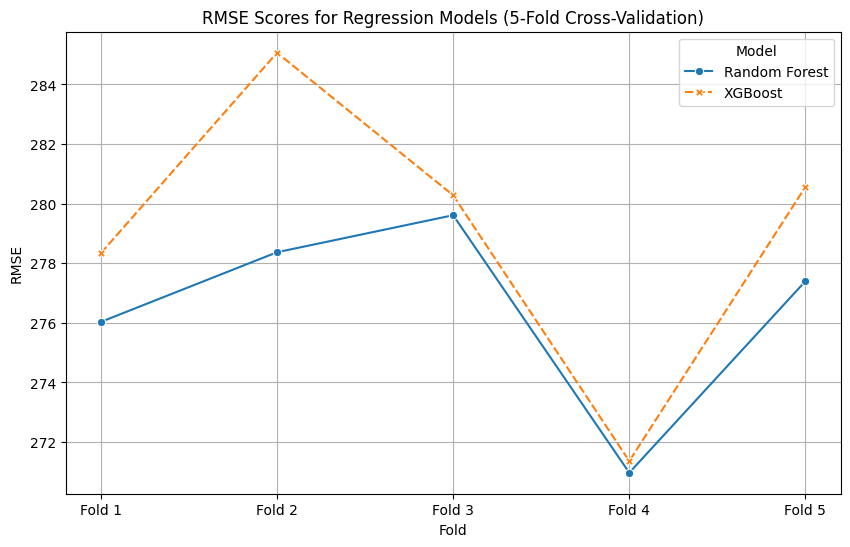

In [ ]:
# --- Definisikan Model ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# --- List Model dan Nama ---
reg_models = [rf, xgb_model]
reg_names = ['Random Forest', 'XGBoost']

# --- Cross Validation dan Simpan Skor ---
reg_scores = []
for model in reg_models:
    neg_mse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-neg_mse)  # Karena scoring neg_mse itu nilai negatif, harus dikali -1 dulu sebelum sqrt
    reg_scores.append(rmse)

# --- Buat DataFrame dari Hasil RMSE ---
df_reg_scores = pd.DataFrame(reg_scores, index=reg_names).T

# --- Visualisasi RMSE Per Fold ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_reg_scores, markers=True)
plt.title('RMSE Scores for Regression Models (5-Fold Cross-Validation)')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend(title='Model', loc='upper right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

##**Feature Selection**

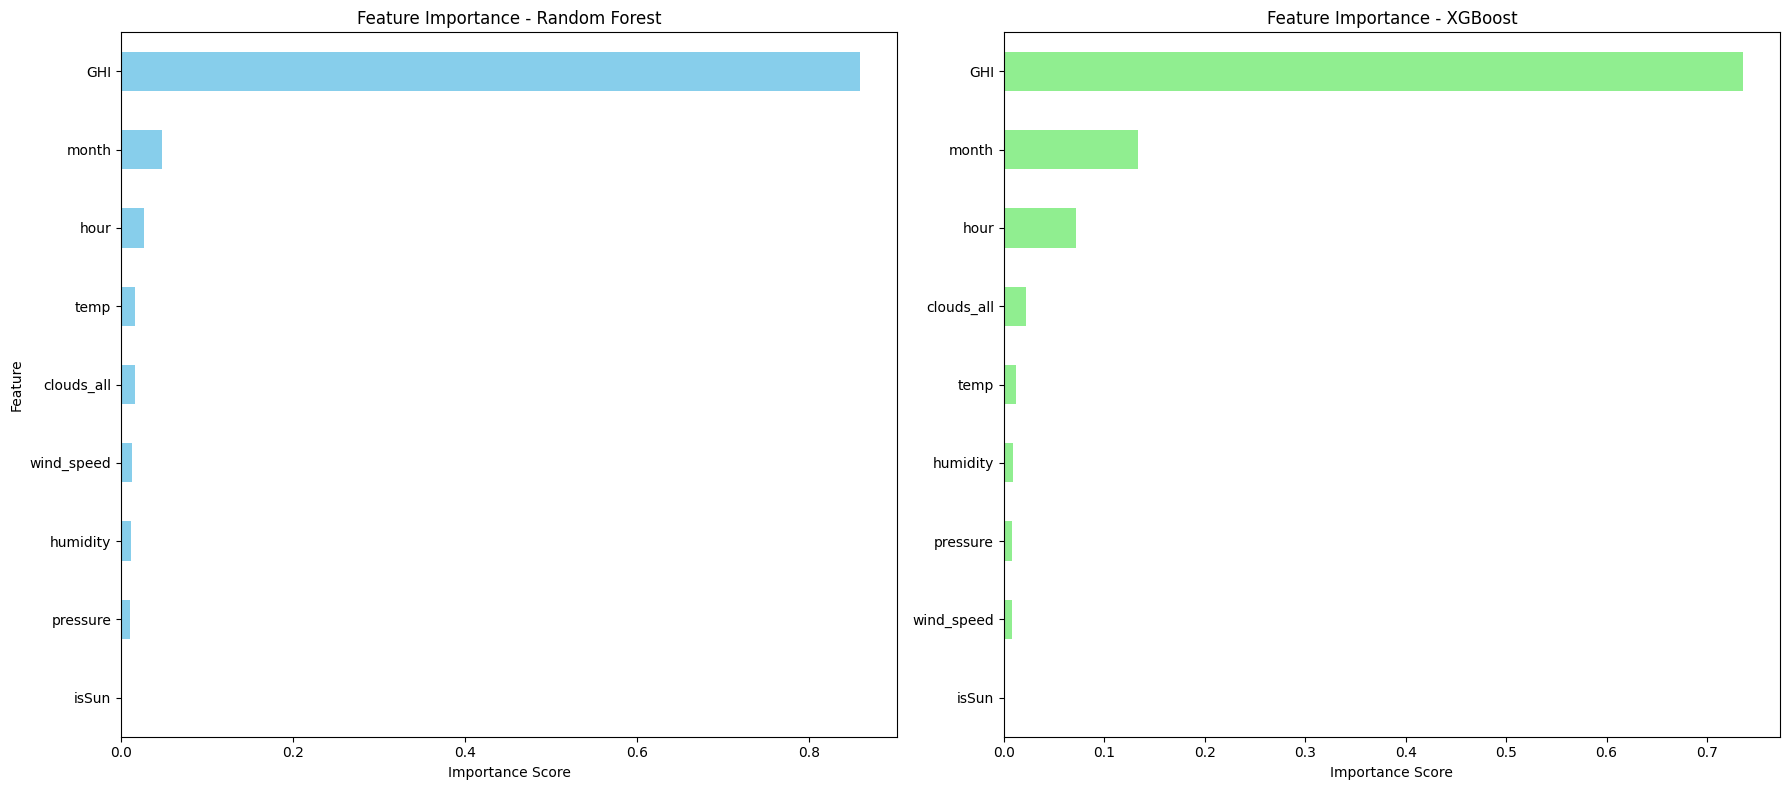

In [ ]:
# Random Forest
importances_rf = model_rf.feature_importances_
feature_importance_rf = pd.Series(importances_rf, index=features).sort_values(ascending=True)  # Ascending buat horizontal lebih rapi

# XGBoost
importances_xgb = model_xgb.feature_importances_
feature_importance_xgb = pd.Series(importances_xgb, index=features).sort_values(ascending=True)

# --- Plot Gabungan ---
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 baris, 2 kolom

# Random Forest plot
feature_importance_rf.plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_title('Feature Importance - Random Forest')
axes[0].set_xlabel('Importance Score')
axes[0].set_ylabel('Feature')

# XGBoost plot
feature_importance_xgb.plot(kind='barh', color='lightgreen', ax=axes[1])
axes[1].set_title('Feature Importance - XGBoost')
axes[1].set_xlabel('Importance Score')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


##**Tuning Hyperparameter**

###**Random Forest Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Model dasar
rf = RandomForestRegressor(random_state=42)

# 2. Hyperparameter sederhana yang mau dicoba
param_grid_rf = {
    'n_estimators': [100, 200],  # Banyaknya pohon
    'max_depth': [5, 10],         # Kedalaman pohon
    'min_samples_split': [2, 5]   # Minimal data untuk split
}

# 3. Tuning pakai GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,                         # 3-fold cross-validation, biar cepet
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# 4. Fit GridSearch ke data train
grid_search_rf.fit(X_train_scaled, y_train)

# 5. Lihat hasil terbaik
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best RMSE (Random Forest):", np.sqrt(-grid_search_rf.best_score_))

# 6. Pakai model terbaik
best_rf_model = grid_search_rf.best_estimator_
# Random Forest (hasil tuning)
y_pred_best_rf = best_rf_model.predict(X_test_scaled)


Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE (Random Forest): 294.2129467421874


###**XGBoost Regressor**

In [ ]:
# 1. Model dasar
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# 2. Hyperparameter sederhana yang mau dicoba
param_grid_xgb = {
    'n_estimators': [100, 200],    # Banyak boosting round
    'max_depth': [3, 6],           # Kedalaman pohon
    'learning_rate': [0.1, 0.3]    # Seberapa cepat belajar
}

# 3. Tuning pakai GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# 4. Fit GridSearch ke data train
grid_search_xgb.fit(X_train_scaled, y_train)

# 5. Lihat hasil terbaik
print("Best Parameters (XGBoost):", grid_search_xgb.best_params_)
print("Best RMSE (XGBoost):", np.sqrt(-grid_search_xgb.best_score_))

# 6. Pakai model terbaik
best_xgb_model = grid_search_xgb.best_estimator_

# XGBoost (hasil tuning)
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)


Best Parameters (XGBoost): {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 200}
Best RMSE (XGBoost): 279.02025856109447


##**Determine Next Steps**

Dari pemodelan dan evaluasi yang telah dilakukan, disimpulkan bahwa model yang digunakan memberikan hasil yang baik dan dapat diterapkan untuk tujuan yang telah ditentukan, seperti prediksi status keselamatan penumpang Titanic atau estimasi harga tiket. Meskipun ada variasi dalam performa, model-model yang ada menunjukkan akurasi yang cukup memadai.

Selanjutnya, tahapan ini akan dilanjutkan ke deployment, yaitu proses penerapan model ke dalam penggunaan nyata. Pada tahap ini, model akan mulai digunakan untuk membantu pengambilan keputusan, serta dipastikan tetap berjalan dengan baik dan relevan seiring waktu.

#**DEPLOYMENT**

#####**Mandatory: Save Model For Deployment**

In [ ]:
import pickle

# Save scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save best Random Forest model
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

# Save best XGBoost model
with open('best_xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)

###**Plan Deployment**

Implementasi hasil analisis dan pemodelan rencananya akan dilakukan dalam dua bentuk utama. Pertama, visualisasi data disajikan melalui Looker Studio dengan menggunakan data yang telah melalui proses data preparation, namun belum dilakukan mapping atau encoding untuk mempertahankan keterbacaan data kategorikal oleh pengguna. Dashboard ini dirancang untuk menyampaikan informasi secara informatif dan mudah dipahami.

Kedua, model prediktif dirilis dalam bentuk layanan RESTful API menggunakan FastAPI. API ini menerima input yang telah dipreproses dan memberikan hasil prediksi secara real-time, sehingga memungkinkan integrasi langsung ke dalam sistem atau aplikasi yang membutuhkan prediksi berbasis data. Tahapan ini menjadi langkah penting dalam memastikan hasil analisis dapat dimanfaatkan secara praktis dan berkelanjutan.

###**Final Report**

Proses implementasi hasil analisis dan pemodelan telah dilakukan, untuk mengakses dashboard visualisasi data dan model prediktif dapat melalui link sebagai berikut:

*   Dashboard:https://lookerstudio.google.com/reporting/9521d64f-114f-43e6-9e68-580f8ce9c440
*   API:http://127.0.0.1:8000/docs

###**Review Project**

Adapun slide deck yang merangkum semua hasil analisis yang dilakukan dari tahapan awal hingga akhir dalam bentuk materi presenstasi dengan kesimpulan akhir serta solusi dari permasalahan yang dianalisis dapat diakses melalui link sebagai berikut:

*   Slide Deck:https://docs.google.com/presentation/d/1Ubq87wL8U4AKoYUDxhT1xcIHTLXh-Cruo0f2He5nAqw/edit?usp=sharing